In [1]:
import requests
from IPython.display import Image

In [2]:
import pandas as pd

In [3]:
genes = pd.read_csv('genes.csv')

In [15]:
genes['gene family'].unique()

array(['Styles and Movements', 'Medium and Techniques', 'Materials',
       'Subject Matter', 'Time Periods', 'Design Movements',
       'Visual Qualities', 'Cultural and Religious Styles',
       'Geographic Regions', 'Artistic Disciplines',
       'Furniture and Lighting', 'Tableware, Vessels, and Objects',
       'Textiles', 'Antiquities, Artifacts, and Religious Objects',
       'Design Concepts and Techniques', nan,
       'Jewelry and Fashion Object Types'], dtype=object)

In [16]:
styles = [s.replace('-', ' ') for s in genes[genes['gene family']=='Visual Qualities']['slug'].unique()]

In [17]:
vtset = set(valid_tokens)
filtered_styles = [s for s in styles if all([t in vtset for t in s.split(' ')])]

In [18]:
filtered_styles

['metallic',
 'rough',
 'psychedelic',
 'color gradient',
 'primary abstraction',
 'angular',
 'highly detailed',
 'primary colors',
 'bright and vivid colors',
 'shiny slash glossy',
 'smooth surface',
 'dotted',
 'patterns',
 'striped',
 'blurred',
 'transparent slash translucent medium',
 'single object',
 'scattered composition',
 'hard edged 1',
 'molecular 1',
 'layered images',
 'dense composition',
 'grid',
 'tangled forms',
 'piles slash stacks',
 'irregular linear forms',
 'stained glass effect',
 'extreme angle',
 'linear forms',
 'emphasis on linear perspective',
 'geometric',
 'slender',
 'pastel colors',
 'black and white',
 'dark colors',
 'earth tones',
 'raw versus finished',
 'blown off roof perspective',
 'wrapped',
 'contour line',
 'cracked',
 'balance']

In [9]:
def view_art(art):
    tags = {}
    clusters = {}
#     for a in art:
#         for t in a['standard_tags']:
#             if t in tags:
#                 tags[t]+=1
#             else:
#                 tags[t]=1
#         try:
#             if a['metadata']['cluster_id'] in clusters:
#                 clusters[a['metadata']['cluster_id']]+=1
#             else:
#                 clusters[a['metadata']['cluster_id']]=1
#         except:
#             pass

    print(f'TAGS: {sorted(tags, key=lambda x:-tags[x])}')
    print(f'CLUSTERS: {sorted(clusters, key=lambda x:-clusters[x])}')

    
    for a in art:
        art = a['images']
        print(a['id'])
        display(Image("https://storage.googleapis.com/artsnob-image-scrape/"+art, width=400, height=400))


In [8]:
def view_art_ids(ids):
    for idx in ids:
        art = requests.get(f'http://localhost:8000/art/{idx}')
        print(idx)
        try:
            display(Image("https://storage.googleapis.com/artsnob-image-scrape/"+art.json()['images'], width=400, height=400))
        except:
            continue
        

In [ ]:
TAGS=['boho']
d=requests.get(f'http://localhost:8000/tags/Boho?n_return=25&return_clusters=true')
view_art(d.json()['art'])

In [ ]:
"""
Let's see if we can find overlap between existing clusters

"""

In [10]:
import sys
import os
sys.path.insert(0,f'{os.getcwd()}/../art_snob_primrose/')
from src.datastore_reader import DataStoreReader
from src.list_flattener import ListFlattener
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pickle
import requests
from IPython.display import Image

In [76]:
# get all the features from datastore
project='artsnob-1'
kind='01272021-inverse-cluster-index'

dsr = DataStoreReader()
entities = dsr.execute(project, kind, max_records=None)

/Users/mike/Projects/envs/.env_deco_primrose/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
2021-02-12 14:32:51,016 INFO datastore_reader.py execute: Starting datastore read from kind: 01272021-inverse-cluster-index
2021-02-12 14:32:52,459 INFO datastore_reader.py execute: Read down 100 records from kind: 01272021-inverse-cluster-index


In [135]:
std_scores = []
text_vectors = []
for s in styles:
    print(s)
    d=requests.get(f'http://localhost:8001/semantic_neighbors/?query={s}').json()
    std_scores.append(d['std_dist'])
    text_vectors.append(d['text_vec'])
    
style_variance = pd.DataFrame({'style': styles, 'std': std_scores, 'txt_vec': text_vectors})

art informel
futurism
constructivism
gutai
nouveau realisme
post impressionism
pointillism
purism
romanticism
fluxus
new york school
art deco
ashcan school
neo expressionism
outsider art
bauhaus
hudson river school
barbizon school
body art
mexican muralism
group zero
arte povera
east village art
luminism
pattern and decoration movement
socialist realism
art nouveau
bad painting
color field painting
de stijl
folk art
impressionism
nabis
surrealism
fauvism
neo dada
pittura metafisica
neue sachlichkeit
social realism
symbolism
cubism
dada
pictorialism
harlem renaissance
postminimalism
synchromism
mannerism
feminist art
renaissance
modern photography
young british artists ybas
viennese actionism
contemporary portrait photography
contemporary figurative painting
group f slash 64
dutch and flemish
figurative sculpture
op art
japonisme
american tonalism
conceptual art
the pictures generation
fashion photography
suprematism
baroque
german expressionism
process art
post world war i european cla

In [150]:
style_variance.sort_values('std', ascending=True).iloc[:25]

style       std  \
83                         happenings  0.011872   
212                  documentary film  0.011878   
134                     social action  0.011971   
98                         dau al set  0.012070   
123                    group material  0.012399   
144  contemporary fact versus fiction  0.012764   
32                              nabis  0.012778   
0                        art informel  0.013480   
90         contemporary participation  0.013671   
176            the aesthetic movement  0.013733   
132                           mono ha  0.013940   
87                          nul group  0.014469   
10                    new york school  0.014506   
104             relational aesthetics  0.014558   
147                      grand manner  0.014765   
194    collaborations and collectives  0.014855   
206                      rinpa school  0.015106   
217               identity politics 1  0.015271   
236                             colab  0.015288   
120     contemporary academic realism  0.015380   
61            the pictures generation  0.015436   
102                 early renaissance  0.015489   
55                  dutch and flemish  0.015635   
60                     conceptual art  0.015693   
124      contemporary graphic realism  0.015966   

                                               txt_vec  
83   [-0.004794728476554155, -0.01719745434820652, ...  
212  [0.0009552297997288406, -0.018508367240428925,...  
134  [0.004342350643128157, -0.023325271904468536, ...  
98   [-0.004443751182407141, -0.011310474015772343,...  
123  [0.016146080568432808, 0.011952846311032772, -...  
144  [0.01556758675724268, 0.001587614300660789, -0...  
32   [-0.00015538051957264543, -0.01614542119204998...  
0    [0.005267051514238119, -0.002354589058086276, ...  
90   [0.026609191671013832, 0.019016090780496597, -...  
176  [0.003066265257075429, 0.013996884226799011, -...  
132  [0.0028876562137156725, 0.0006218368653208017,...  
87   [0.016169024631381035, -0.002992297289893031, ...  
10   [-0.0046553839929401875, -0.025120703503489494...  
104  [0.012243745848536491, 0.037121742963790894, 0...  
147  [-0.019205037504434586, -0.004578964319080114,...  
194  [0.004796102177351713, 0.027986623346805573, 0...  
206  [-0.019755316898226738, 0.0024990171659737825,...  
217  [-0.0007844349602237344, -0.0099009545519948, ...  
236  [0.019667237997055054, 0.008023794740438461, 0...  
120  [0.004149623215198517, 0.02296842820942402, -0...  
61   [0.01701415702700615, -0.008606920950114727, -...  
102  [-0.013543504290282726, 0.00629560137167573, 0...  
55   [0.013448180630803108, -0.034799862653017044, ...  
60   [0.013158086687326431, 0.005672882776707411, 0...  
124  [0.01356225274503231, 0.015422835946083069, -0...

In [10]:
"""Let's take a look at what words are even in the model vocab"""
import os
import clip
import torch

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load('ViT-B/32', device)
clip.tokenize(f"a photo of a test")

tensor([[49406,   320,  1125,   539,   320,  1628, 49407,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]])

In [12]:
from clip.simple_tokenizer import SimpleTokenizer as _Tokenizer

In [13]:
tokenizer = _Tokenizer()

In [14]:
"""Get the valid tokens for the model"""
valid_tokens = [k.replace('</w>', '') for k in tokenizer.encoder.keys()]

SIZE: 0.020069564212007052
[-0.3158155679702759, -0.30891507863998413, -0.3043680489063263, -0.3042655289173126, -0.3022094666957855, -0.3000296950340271, -0.2993258237838745, -0.2986767888069153, -0.2984856367111206, -0.29837119579315186, -0.29822617769241333, -0.29744434356689453, -0.2971187233924866, -0.29690563678741455, -0.2961854040622711, -0.2960059344768524, -0.2957928776741028, -0.29559916257858276, -0.295525461435318, -0.2954408526420593, -0.295133113861084, -0.2948767840862274, -0.2945791184902191, -0.29429930448532104, -0.2942046523094177]
4677652260585472


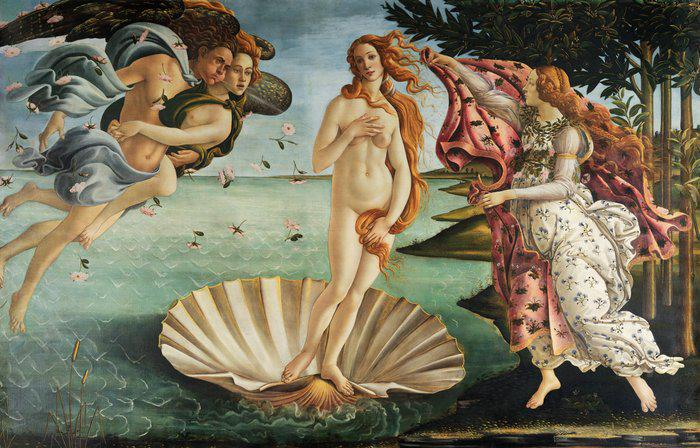

6241707014225920


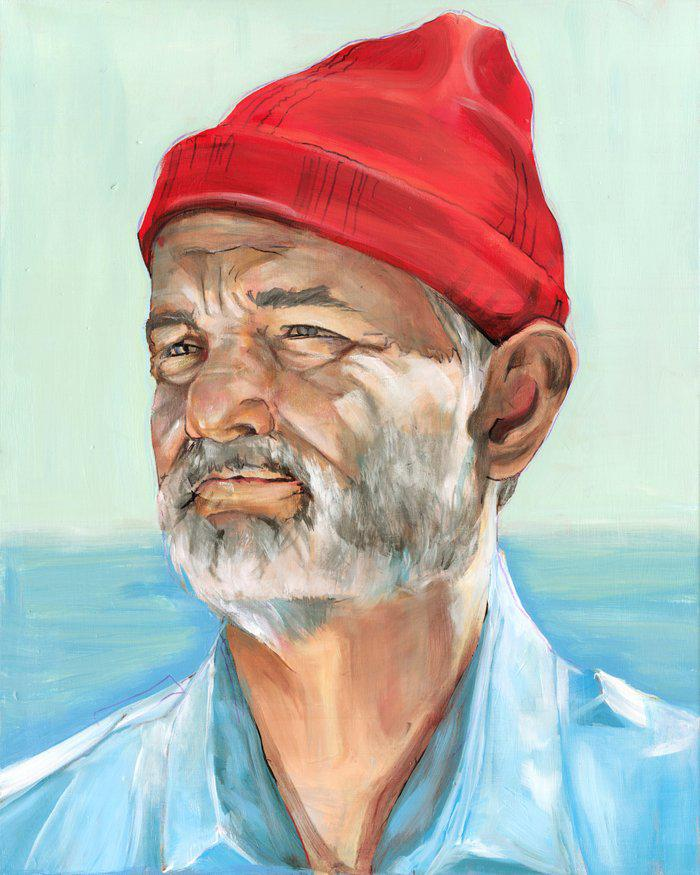

4785778062262272


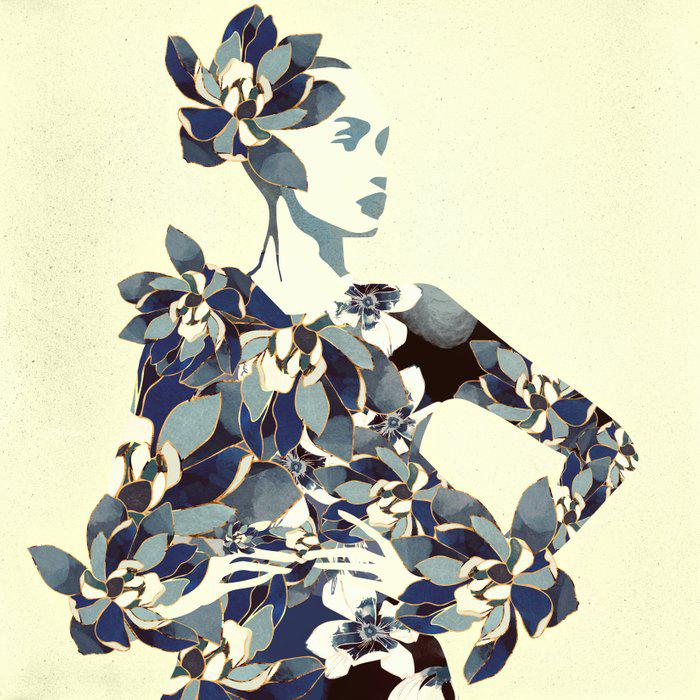

6489882471956480


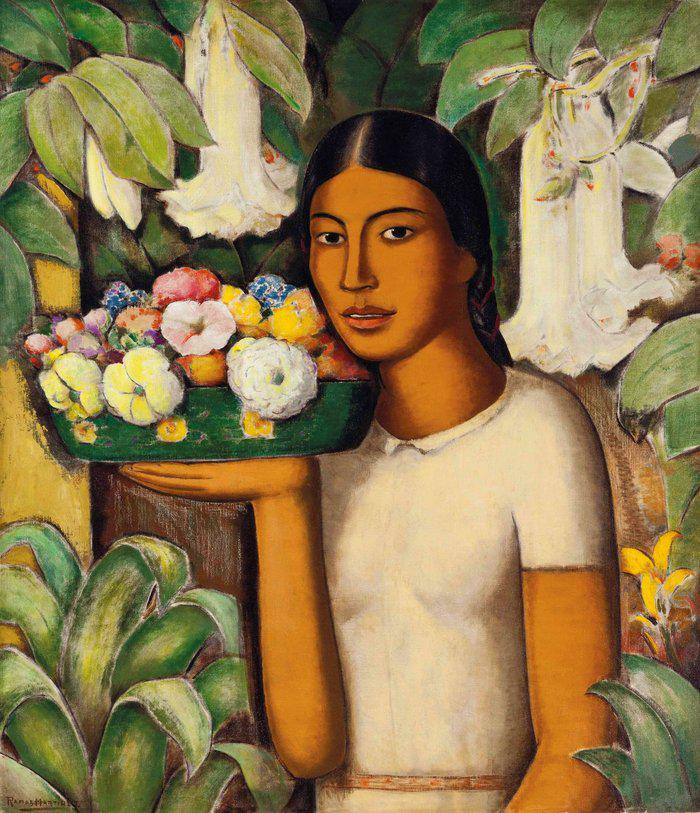

4782576298360832


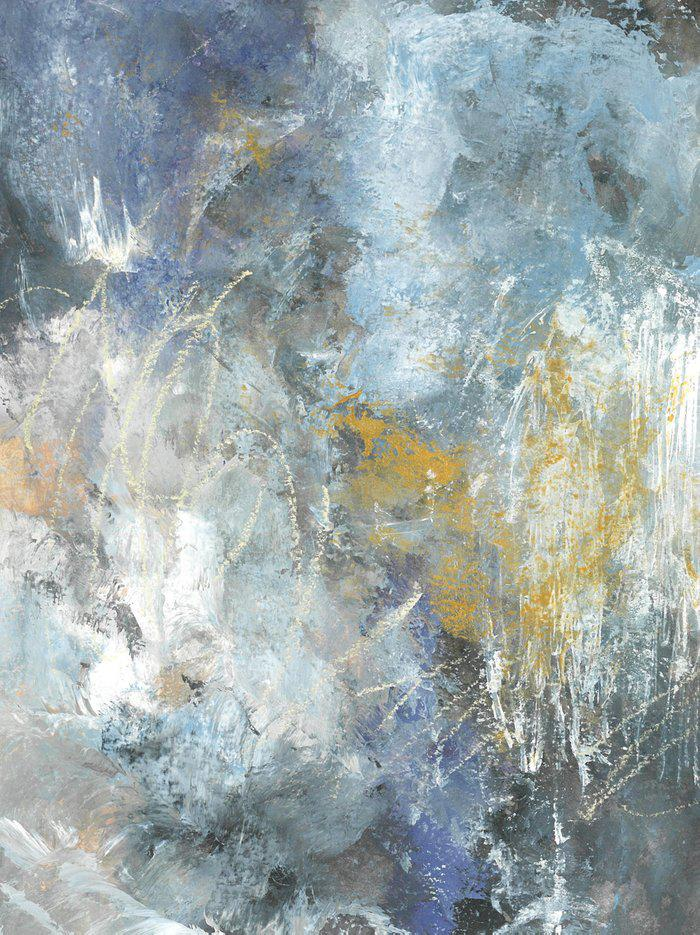

6413402844954624


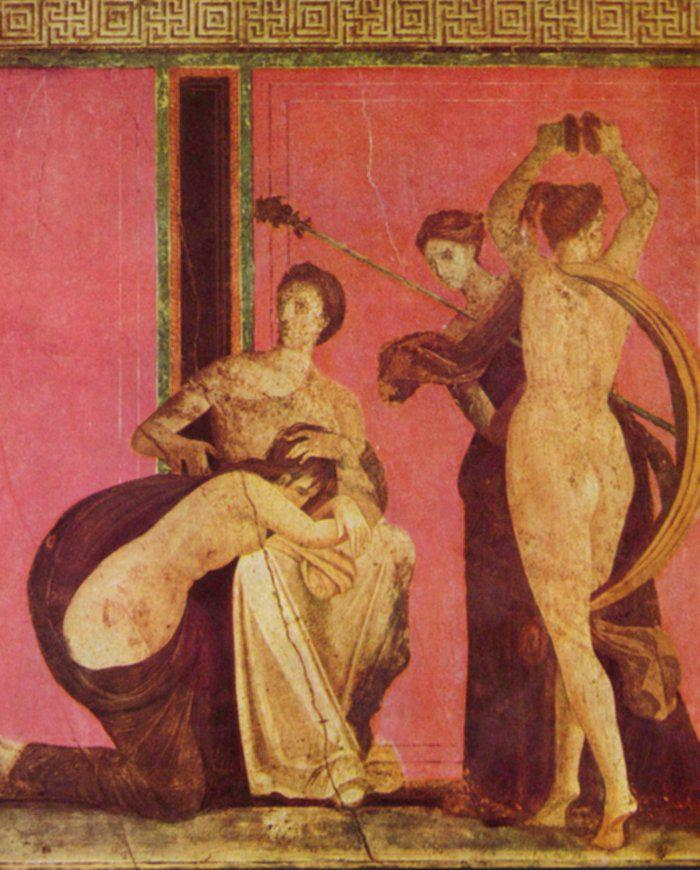

5927448283709440


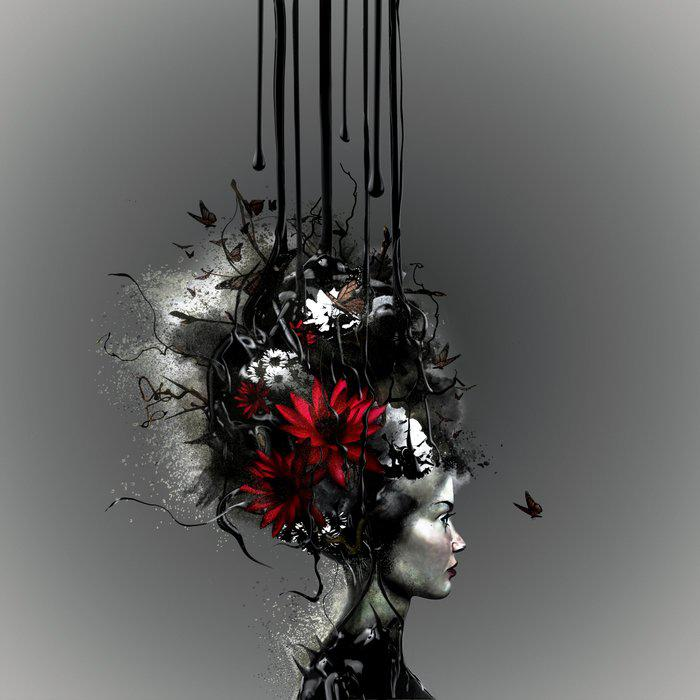

6323246045593600


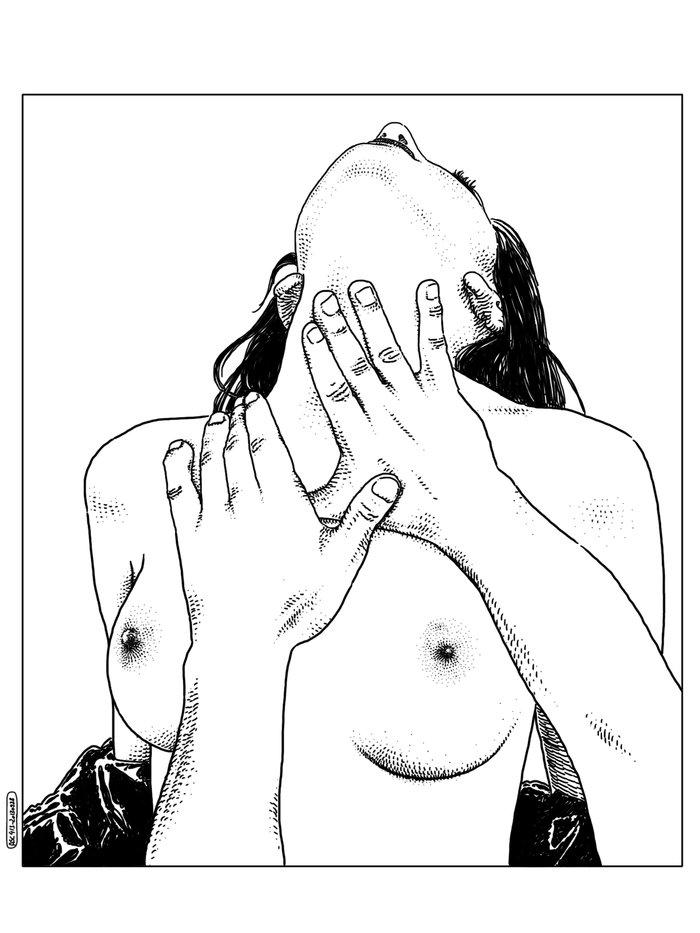

5080348125822976


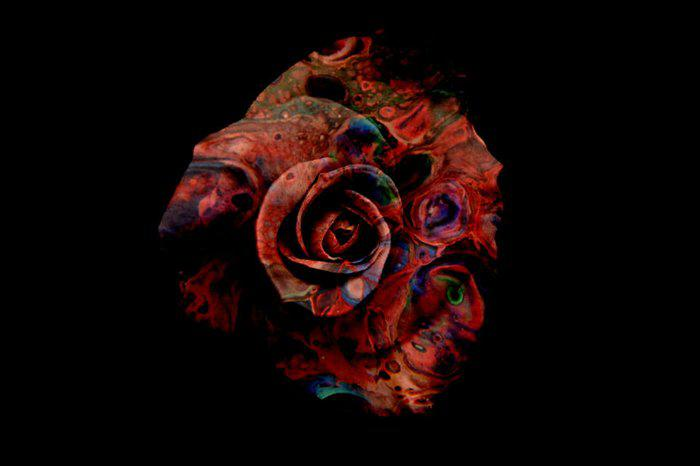

4722982016516096


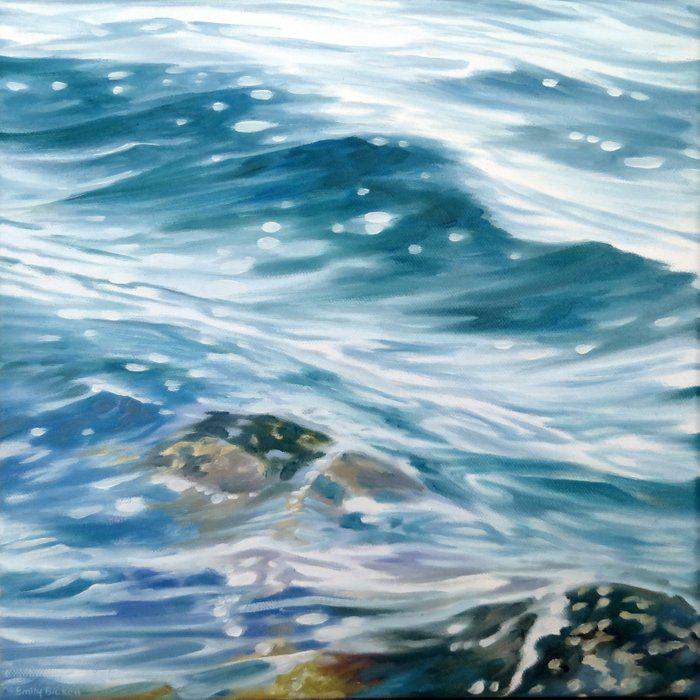

4945641039986688


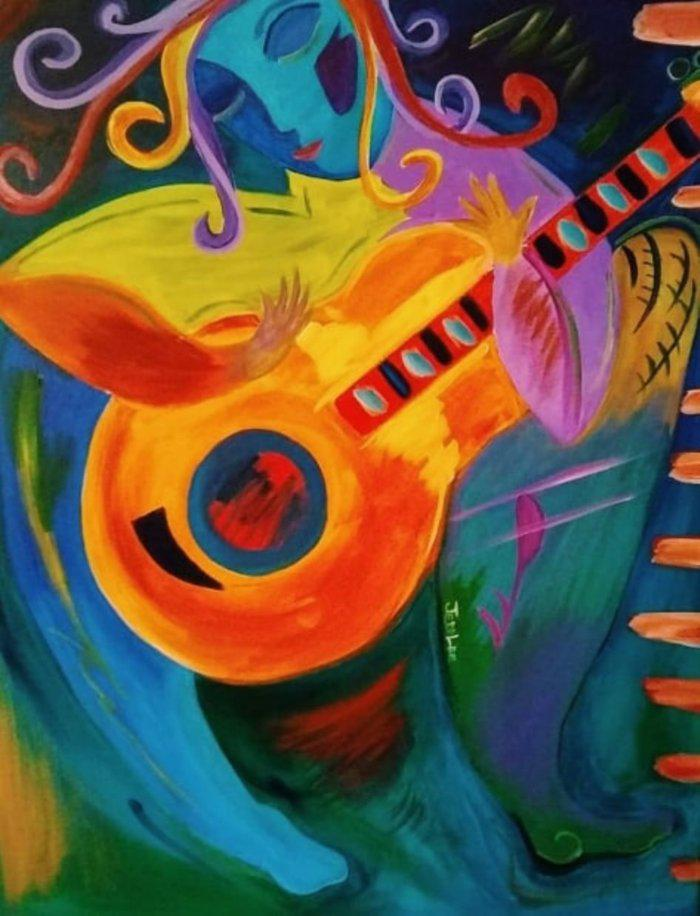

5906890506633216


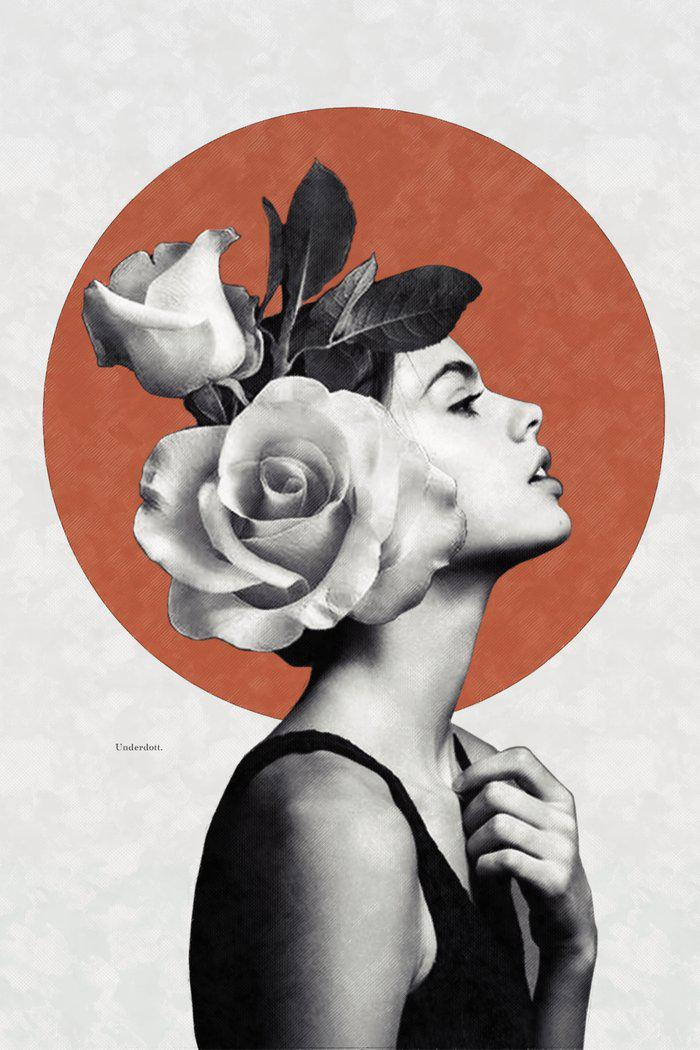

5105843001360384


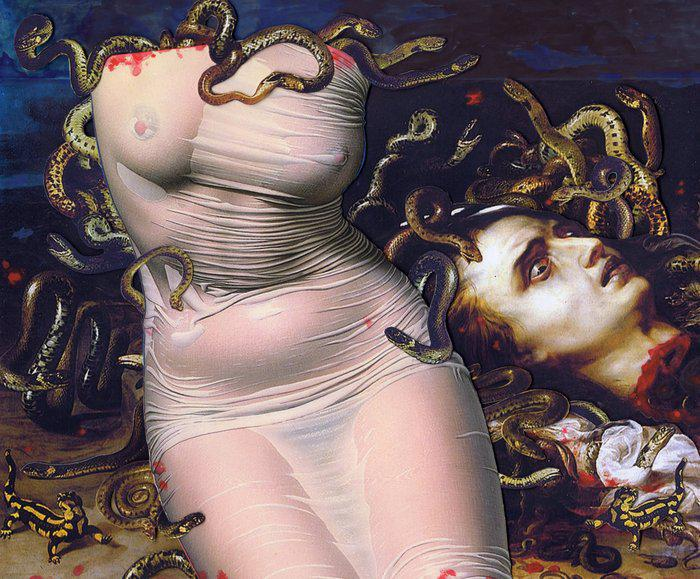

5132121309970432


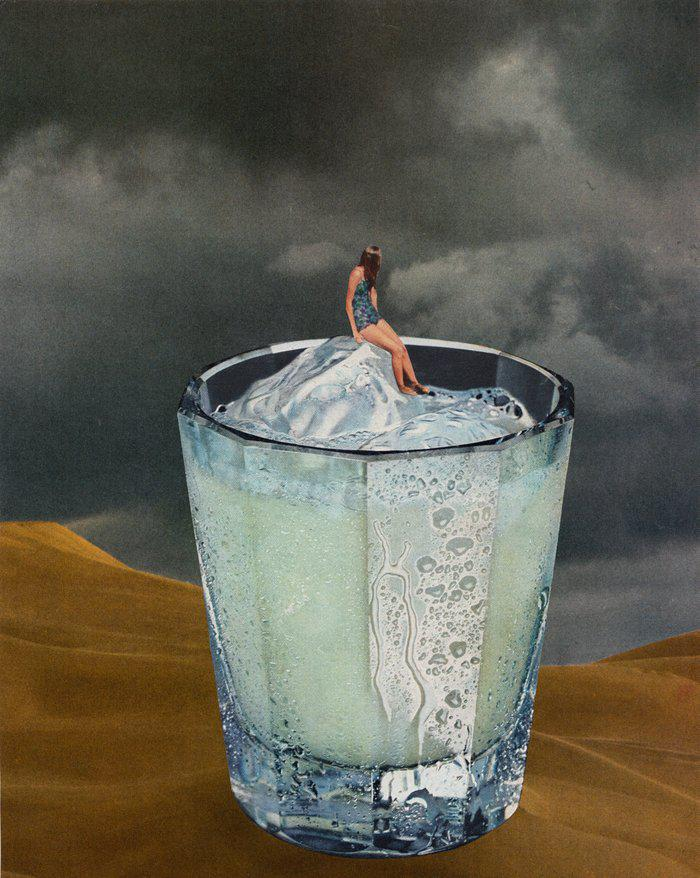

5471020498550784


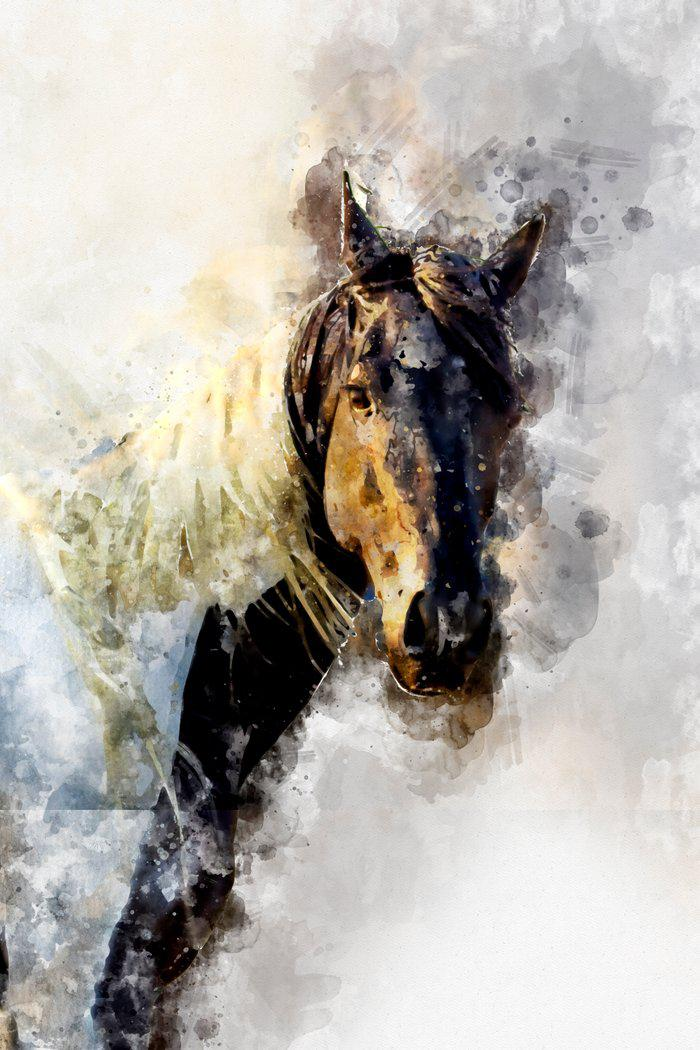

4811607727144960


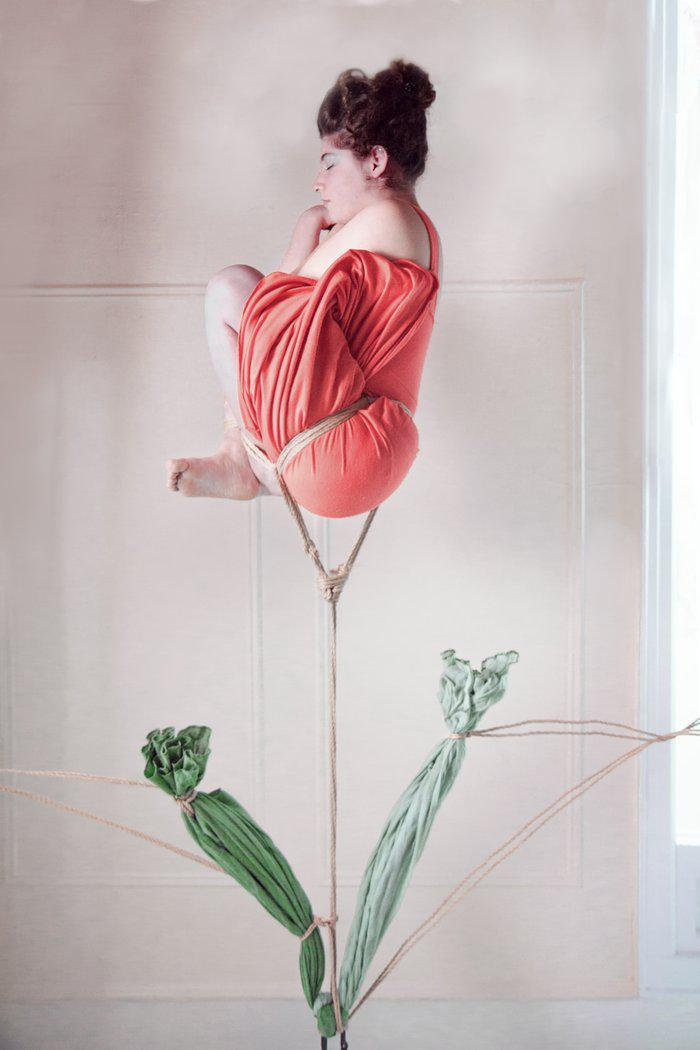

6499167906037760


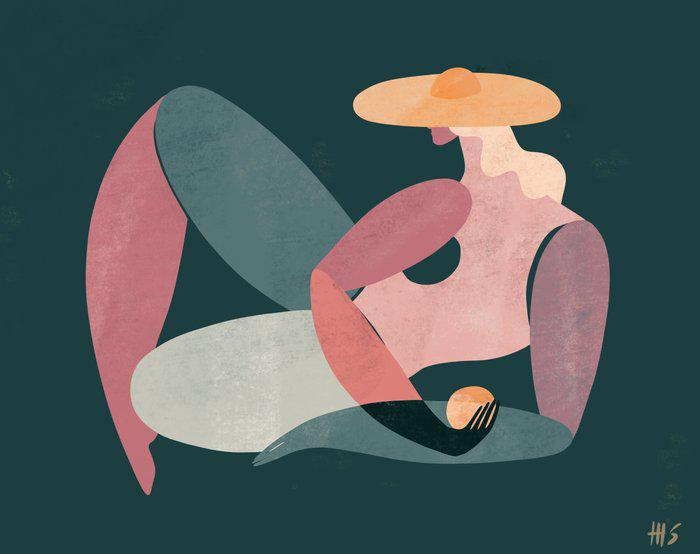

6234675011911680


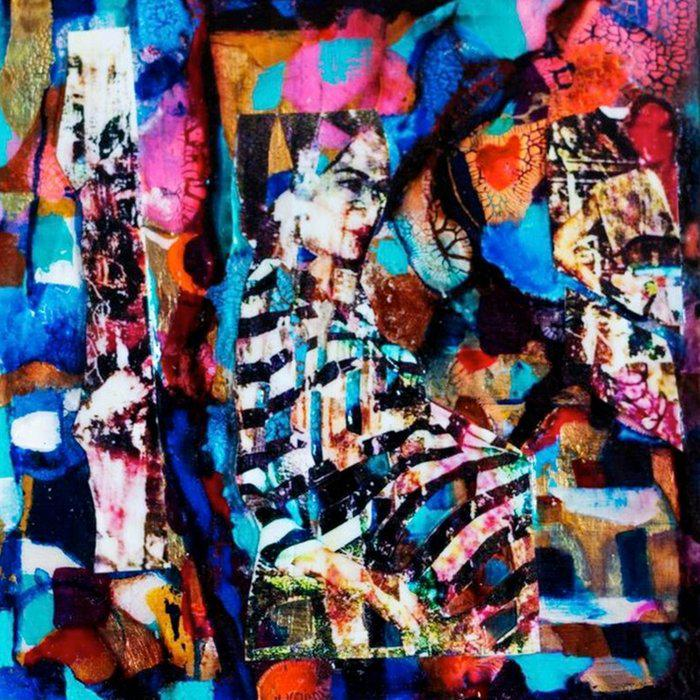

4570373238554624


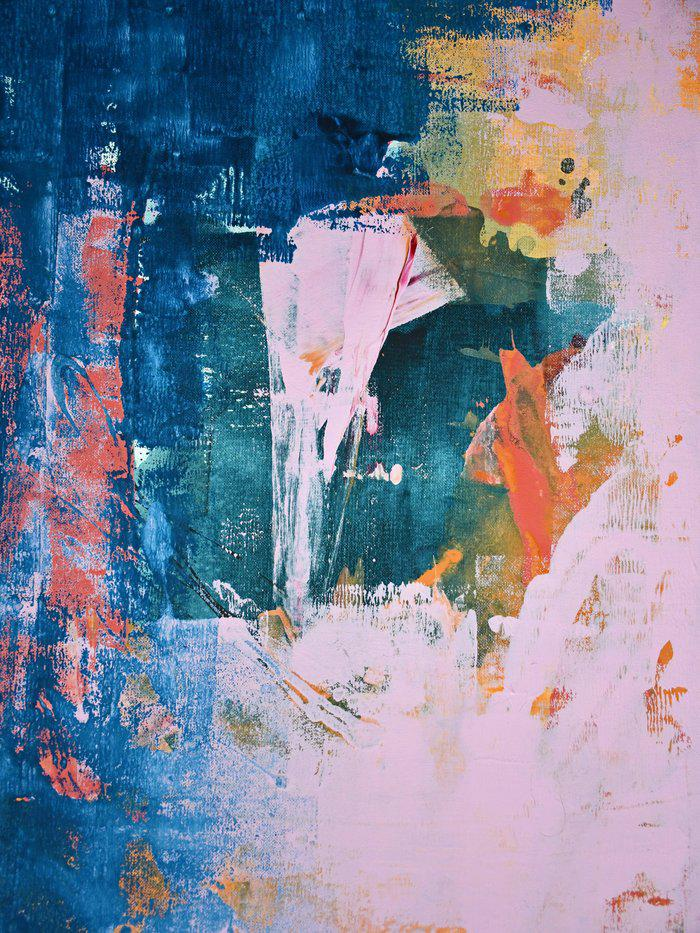

4579069876240384


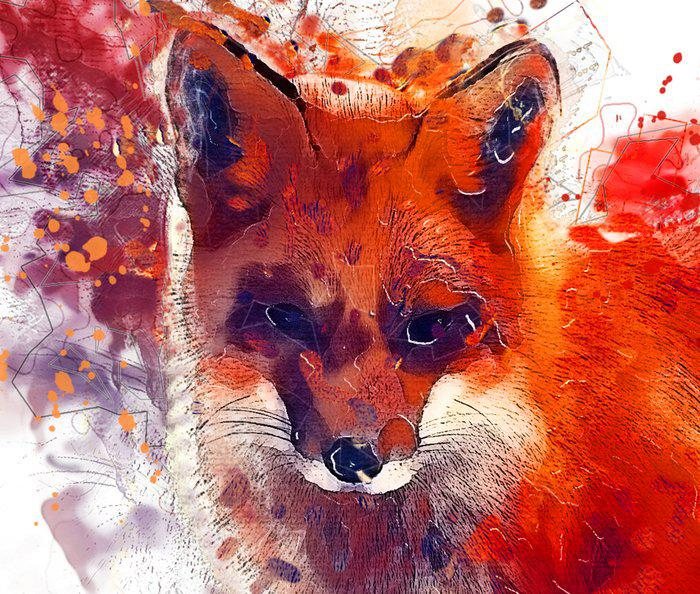

5432495883419648


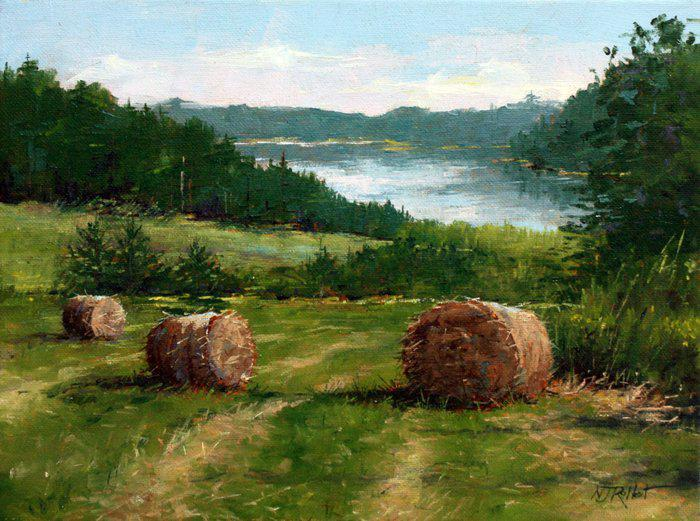

5773935801008128


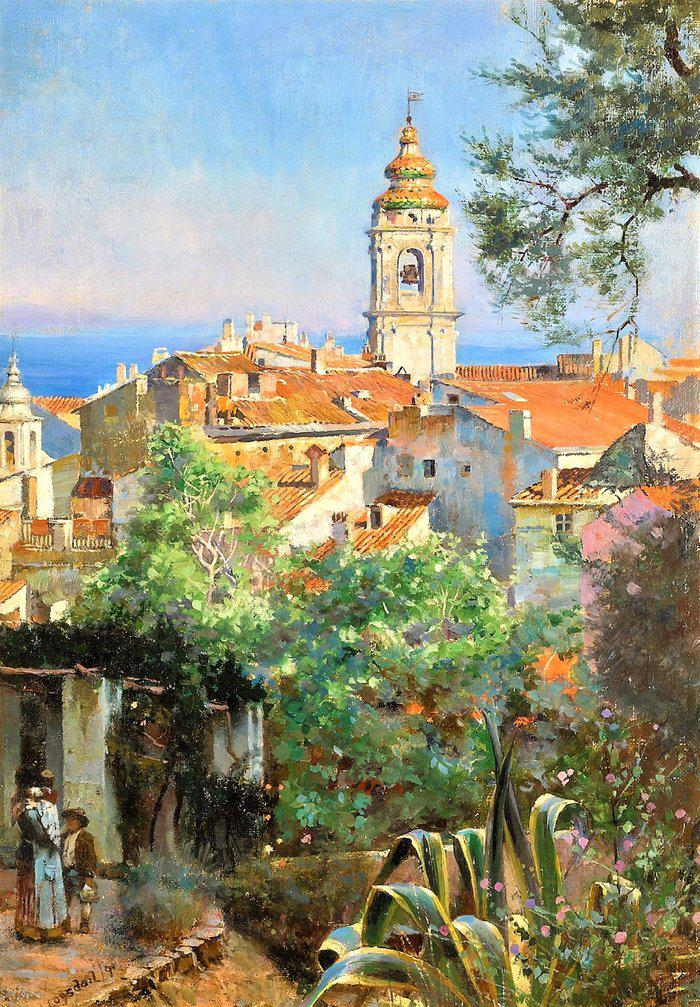

6696005569347584


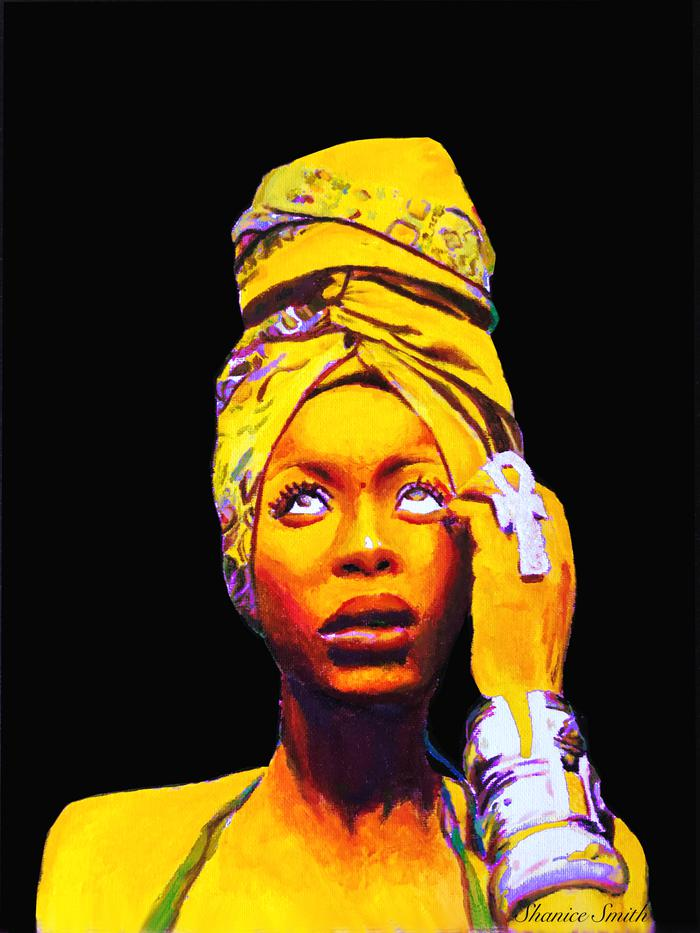

5627794186829824


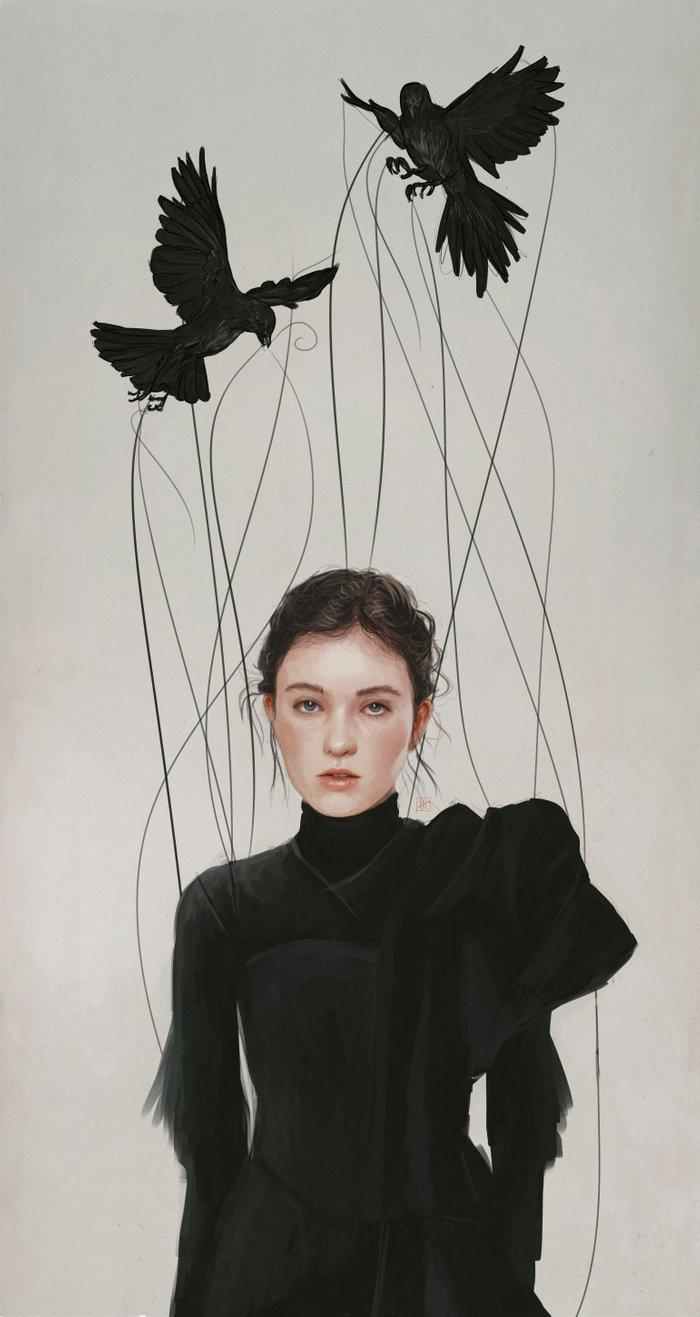

5722313330786304


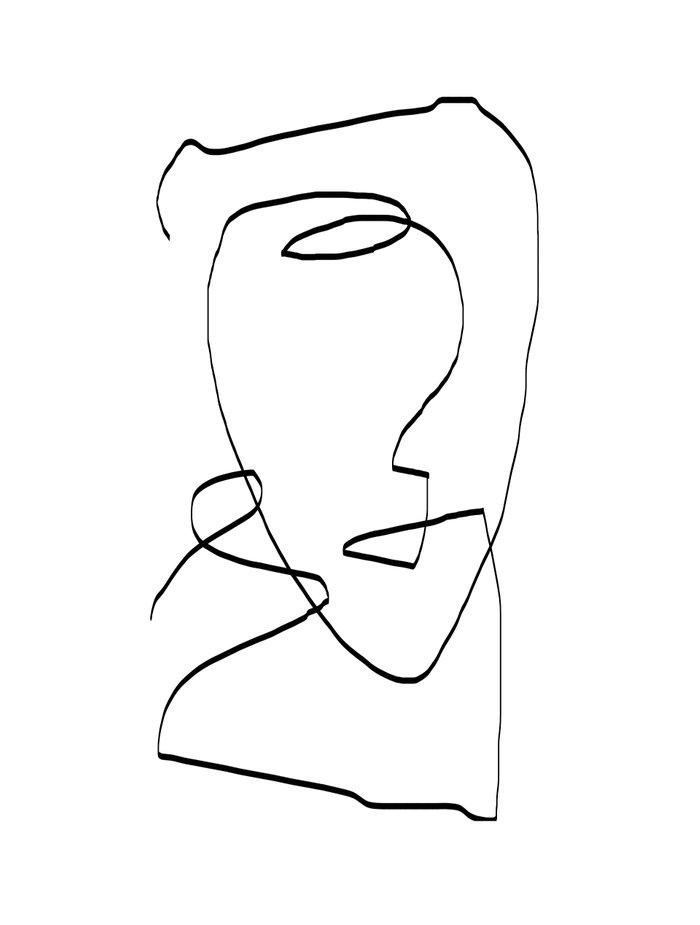

In [34]:
QUERY='figurative art'
d=requests.get(f'http://localhost:8001/semantic_neighbors/?query={QUERY}&relevancy_filter=0.26').json()
dot_products = sorted([-1*x for x in d['dist']])
print(f'SIZE: {d["pct"]}')
print(dot_products[:25])
# view_art_ids(d['neighbors'][:25])
view_art_ids(d['fringe'][:25])

CLUSTER MATCH: 0.3363914373088685
CLIP MATCH: 0.9541064504758547
6470833654464512


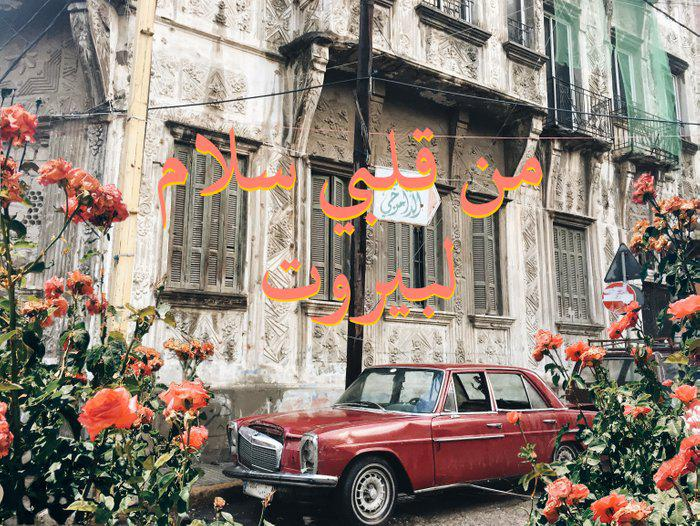

5247069629448192


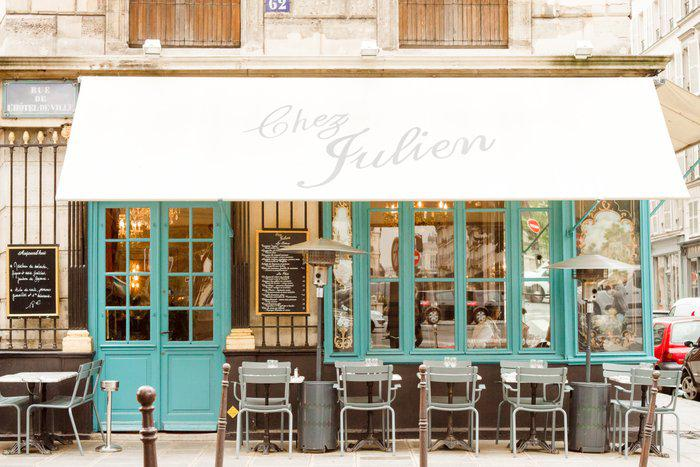

5284158148444160


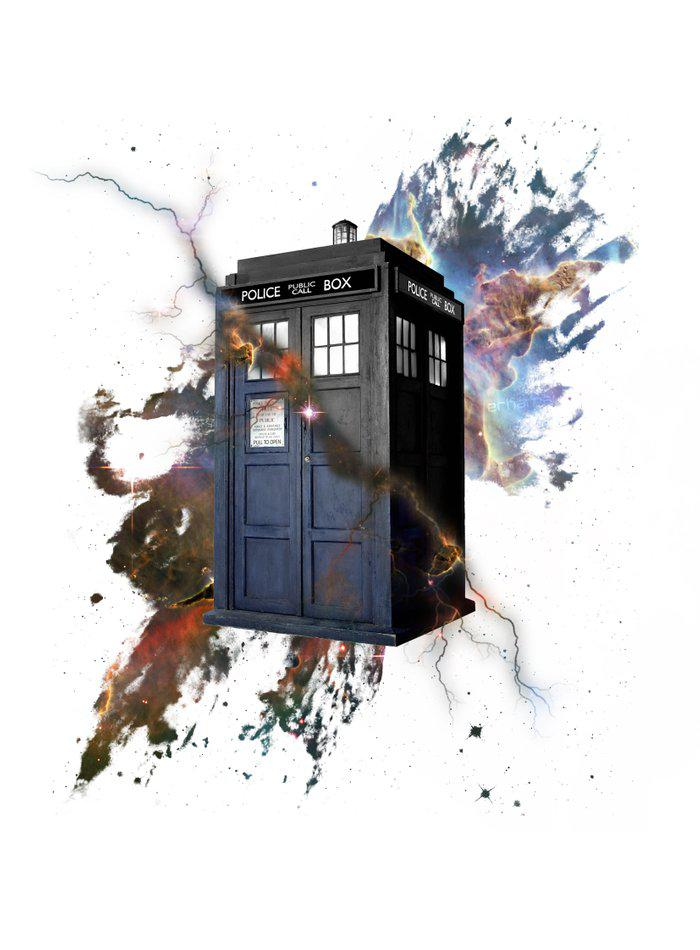

5319675128840192


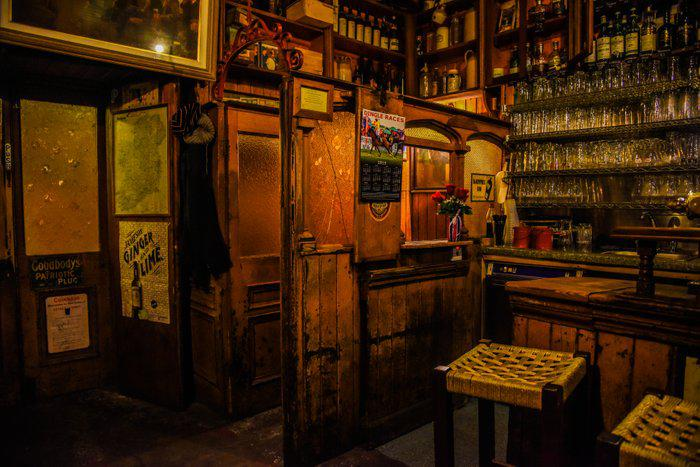

5467822845067264


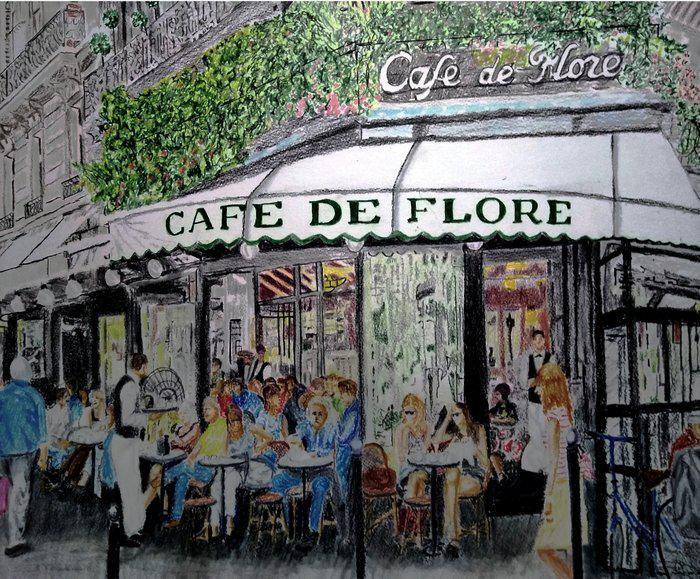

5419662286258176


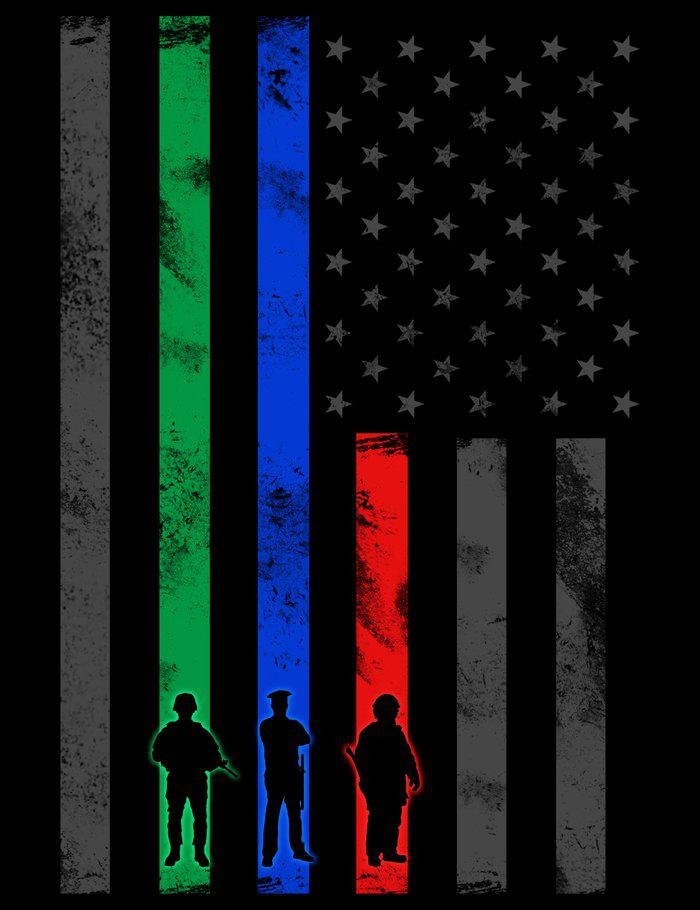

5982612239679488


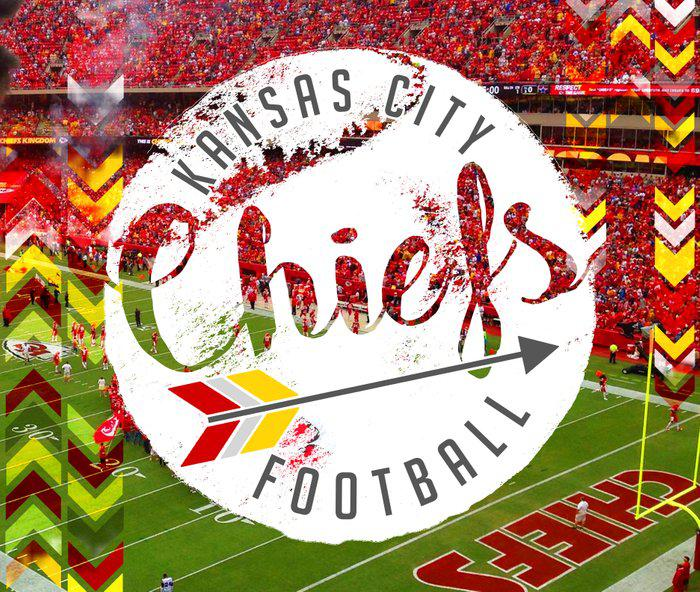

6568479819825152


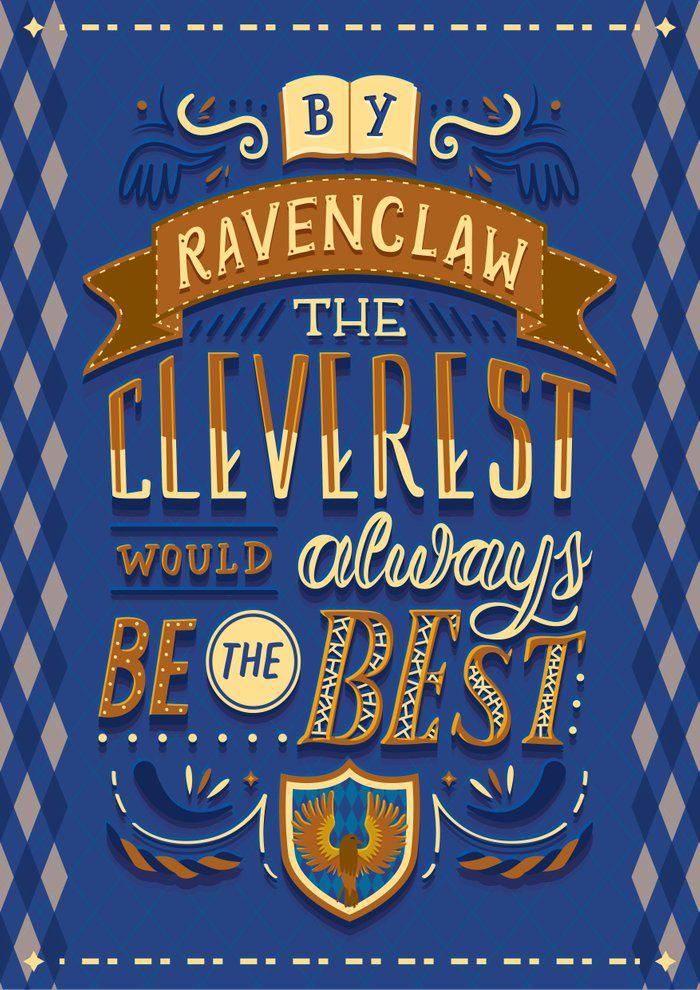

5932274904203264


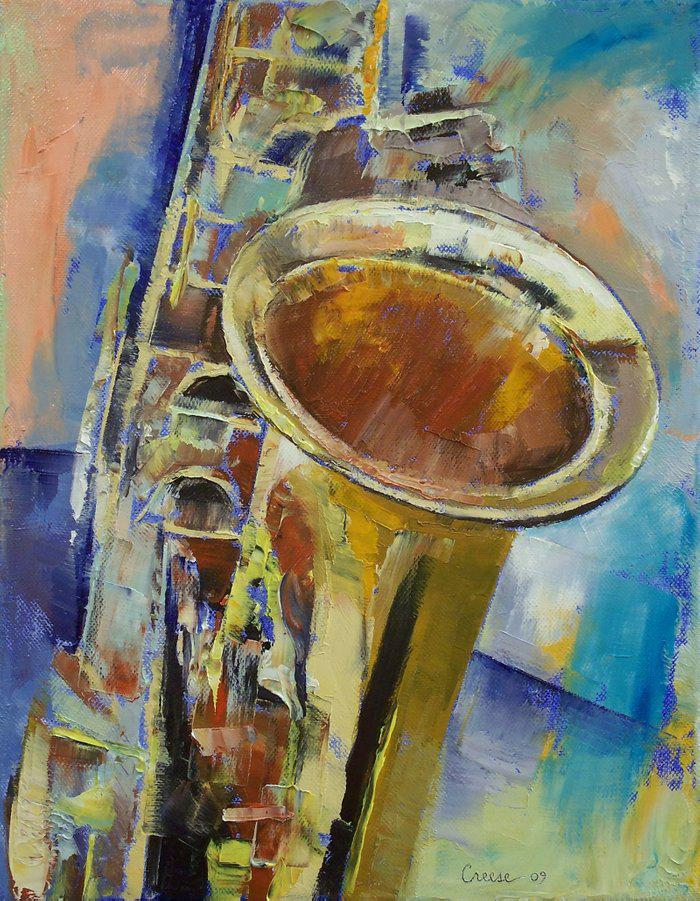

5445629809524736


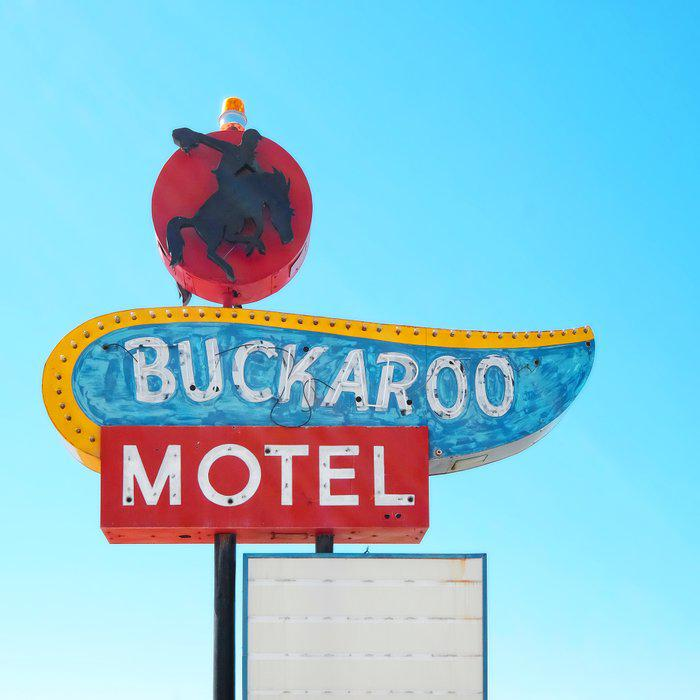

In [94]:
CLUSTER = 1
cluster_ids = set(entities['reader_data'][CLUSTER+1]['idx'])
missing_cluster_ids = cluster_ids - set(d['neighbors'])
missing_clip_ids = set(d['neighbors']) - cluster_ids
print(f'CLUSTER MATCH: {len(missing_cluster_ids) / len(cluster_ids)}')
print(f'CLIP MATCH: {len(missing_clip_ids) / len(d["neighbors"])}')
view_art_ids(list(missing_cluster_ids)[:10])

In [107]:
pd.DataFrame({'d': d['dist']}).sort_values('d', ascending=False)

d
68383  0.309676
61210  0.296185
59406  0.291821
96338  0.291523
77316  0.288723
...         ...
88209  0.076721
79095  0.074840
68232  0.074460
60252  0.071998
8775   0.070306

[103789 rows x 1 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1218a8250>]],
      dtype=object)

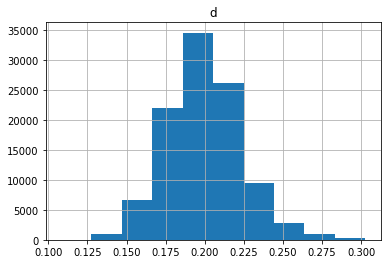

In [115]:
pd.DataFrame({'d': d['dist']}).hist()

In [ ]:
CLUSTER=43

d=requests.get(f'http://localhost:8000/clusters/{CLUSTER}?n_return=35')
view_art(d.json()['art'])

In [69]:
import pandas as pd

In [122]:
vibes = pd.read_csv('tag counts for deco art - Vibes (2).csv')

In [127]:
vibes.Tags = vibes.Tags.fillna(' ')

In [128]:
vibes.Tags = vibes.Tags.map(lambda x: [i.strip(' ') for i in x.split(',')])
vibes.Clusters = vibes.Clusters.map(lambda x: [int(i.strip(' ')) for i in x.split(',')])

vibes = vibes.to_dict(orient='records')

In [130]:
import sys
import os
sys.path.insert(0,f'{os.getcwd()}/../art_snob_primrose/')
sys.path.insert(0,f'{os.getcwd()}/../')

from utilities.datastore_helpers import DataStoreInterface

dsi = DataStoreInterface(project='artsnob-1')

/Users/mike/Projects/envs/.env_deco_primrose/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [131]:
dsi.update(data_list=vibes, kind='12132020-vibes')